## Import modules


Code voor oonderzoek thermische expansie coefficient van onbekend metaal met de Michelson - Inteferometer. 
- Auteurs: Jasper Nierse, Feia Schipper
- Student ID: 15201023 
- Datum: 16/03/25
- Begeleider: Anna van Dun

Test of code opslaat
test 2

In [4]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

from lmfit import models

## Invoeren lijsten met data

Verzamelde data zal in de vorm zijn:
    [Delta] N = N_0 - [N'] waar [N'] de gemeten waarde is uit de inteferro meter bij elke voor de hoeveelheid fringes.

    [theta] = de afgelezen waarde voor de nieuwe hoek die is ontstaan uit na verhogen van de temperatuur.

    [Delta T] = [gemeten temp] - kamertemp  

#### Berekenen brekingsindex van het glas

Brekingsindex wordt berekend uit de dikte van het glas, de invallen hoek van de laser en afgelezen fringes per meting.

De gevonden waarden na het experiment zijn:

In [1]:
# Functie om brekingsindex te berekenen
def brekingsindex():

    gemeten_hoeken = [invullen]
    gemeten_fringes = [invullen]
    dikte = 0.0144 #[m]
    golflengte = te meten # in [m]

    lijst_brekingsindex = []
    teller = 0

    for i in gemeten_hoeken:
        teller_n = (2* dikte - gemeten_fringes[teller] * golflengte) * (1 - np.cos(i))
        noemer_n = 2 * dikte * (1 - np.cos(i)) - gemeten_fringes[teller] * golflengte

        n = teller_n / noemer_n

        lijst_brekingsindex.append(n)
        teller  += 1

    return lijst_brekingsindex

SyntaxError: invalid syntax (1871027345.py, line 7)

Uit deze waarde van n nog een fit maken om een definitieve waarde voor n te vinden die in de volgende formules als constante wordt genomen. De fit zal lineair zijn uit wet van Snell's. 

#### Meting 1
Lijsten met gemeten data van onbekend metaal 1:

Er wordt gemeten op vooraf bepaalde tijdsintervallen Delta_t, waarbij het verschil in fringes bepaald word uit de gemeten fringes bij de corresponderende gemeten temperatuur ten opzichte van de T_0 temperatuur in [K]. Ofwel hoeveel N geteld tot een bepaalde tijdswaarde. 

In [1]:
lijst_N_gemeten_1 = [2,4,8,9,10,11,13]  #[fringes]
T_0_gemeten_1 = 22  #[Kelvind]
lijst_T_eind_gemeten_1 = [28,35,41,49,56,63,70] # Gemeten per tijdseenheid. 
hoek_gemeten_1 = 28 #[hoek graden]
L_0_gemeten_1 = 0.1617 # lengte metaal bij Delta_T = 0


#### Meting 2
Lijsten met gemeten data van onbekend metaal 2:

In [ ]:
lijst_N_gemeten_2 = [nog meten]  #[fringes]
T_0_gemeten_2 = nog meten  #[Kelvin]
lijst_T_eind_gemeten_2 = [nog meten] # Gemeten per tijdseenheid. 
hoek_gemeten_2 =  #[hoek graden]
L_0_gemeten_2 = waarde nog te meten  # lengte metaal bij Delta_T = 0

### Fitten van de gevonden Delta_N en Delta_T voor metaal 1;
 om de richtingscoeff te vinden om alpha te berekenen. 

 Delta_N = a * Delta_T

In [2]:
# Fitten van de waarde voor a.

lijst_Delta_T_meting_1 = []
for i in lijst_T_eind_gemeten_1:
    Delta_T_1 = i - T_0_gemeten_1
    lijst_Delta_T_meting_1.append(Delta_T_1)

# Fout op N, [yerr]
delta_N = 0.5
fout_N_1 = []
for i in lijst_N_gemeten_1:
    fout = i * delta_N
    fout_N_1.append(fout)

# Fout op T, [xerr]
delta_T = 0.05
fout_T = []
for j in lijst_Delta_T_meting_1:
    fout = j * delta_T
    fout_T.append(fout)

#### Plot van de gemeten waardes, Delta_N en Delta_T van meting 1

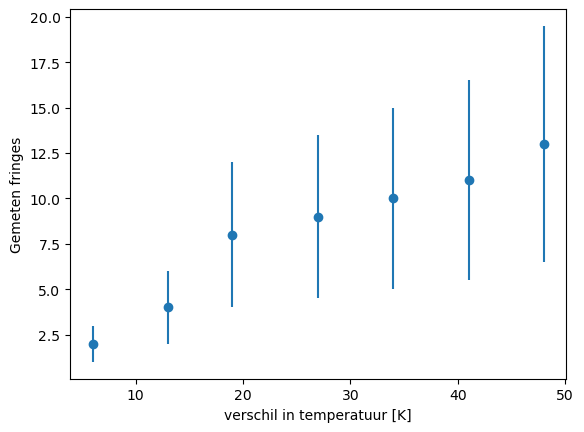

In [5]:
# Plot van de gemeten waardes bij meting 1
plt.figure()

plt.errorbar(lijst_Delta_T_meting_1, lijst_N_gemeten_1, yerr = fout_N_1, fmt='o')
plt.xlabel("verschil in temperatuur [K]")
plt.ylabel("Gemeten fringes")
plt.xlim()
plt.ylim()
plt.show()

#### Plot van de gemeten waardes, Delta_N en Delta_T van meting 2

In [ ]:
# Plot van de gemeten waardes bij meting 1
plt.figure()

plt.errorbar(lijst_Delta_T_meting_2, lijst_N_gemeten_2, yerr = fout_N, fmt='o')
plt.xlabel("verschil in temperatuur [K]")
plt.ylabel("Gemeten fringes")
plt.xlim()
plt.ylim()

Defineren fit waardes

In [14]:
# define fit function with parameters p1 en p2, waar y Delta_N en x Delta_T.

x_1 = lijst_Delta_T_meting_1
y_1 = lijst_N_gemeten_1
x_err_1 = fout_T
y_err_1 = fout_N_1

def fit_function (x, p1):
    y = p1 * x
    return y


# create model of fit function
mod_MI = models.Model(fit_function)

# initialize array and calculate weights
y_err_array_1 = np.array(y_err_1)
y_inv_err_1 = 1 / y_err_array_1


# use model to fit
fit_result_meting_1 = mod_MI.fit(y_1, x = x_1, weights = y_inv_err_1, p1 = 0.28654672)

#### Plot van fit van meting 1

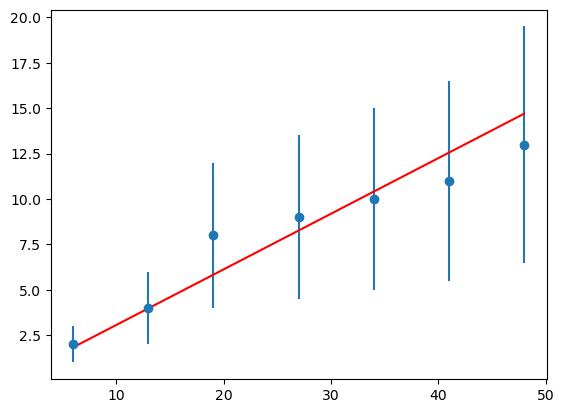

In [15]:
# create new figure
plt.figure()

# create errorbar plot with fit
# data displayed as circles
plt.errorbar(x_1, y_1, yerr = y_err_1, fmt='o')
plt.plot(x_1, fit_result_meting_1.best_fit, 'r-')

plt.show()

Opvragen fit gegevens meting 1

In [16]:
# print fit report
print(fit_result_meting_1.fit_report())

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 7
    # variables        = 1
    chi-square         = 0.50553800
    reduced chi-square = 0.08425633
    Akaike info crit   = -16.3962955
    Bayesian info crit = -16.4503853
    R-squared          = 0.88112014
[[Variables]]
    p1:  0.30624834 +/- 0.01695323 (5.54%) (init = 0.2865467)


### Berekenen van Alpha uit a 

In [18]:
# Functie berekend de thermische expansie coeff uit ingevulde waarde. De constante zijn hetzelfde bij de twee metingen,
# met a de waarde van de richtingscoeff uit de fit van (Delta_N / Delta_T).
def thermische_expansie_coeffiecient(a, lengte_0, gemeten_hoek_graden):

    # Constante waardes
    # N_0 = waarde te meten # Waarde N op kamertemp bij hoek theta = 0
    gemeten_hoek = np.radians(gemeten_hoek_graden)
    arm_lengte = 0.23558 # center draai schijf tot contact punt metaal
    brekingsindex_glas = 1.5 
    dikte_glas = 0.0144 # [m]
    golflengte_laser = 632.8*10**(-9) # Golflengte van laser in [m]

    alpha_teller = a * golflengte_laser * arm_lengte * (brekingsindex_glas - 1 + np.cos(gemeten_hoek))**2
    alpha_noemer = 2 * brekingsindex_glas * dikte_glas * np.sin(gemeten_hoek) * (brekingsindex_glas - 1) * lengte_0
    alpha = alpha_teller / alpha_noemer

    return alpha 

    # # # Verschil in fringes
    # # Delta_N = []

    # # for i in gemeten_N:
    # #     verschil_N = N_0 - i
    # #     Delta_N.append(verschil_N)

    # # Verschil in temperatuur
    # Delta_T = []
    # teller = 0
    # for j in gemeten_T_eind:
    #     verschil_T = j - gemeten_T_0
    #     Delta_T.append(verschil_T)
    #     teller += 1

    # # Berekenen thermische expansie coeff

    # lijst_alpha = []
    # teller = 0

    # for k in Delta_T:
        
    #     teller_alpha = gemeten_N[teller] * golflengte_laser * arm_lengte * (brekingsindex_glas -1 + np.cos(np.radians(gemeten_hoek)))**2
    #     noemer_alpha = 2 * brekingsindex_glas * dikte_glas * np.sin(np.radians(gemeten_hoek)) * (brekingsindex_glas - 1) * lengte_0 * k

    #     alpha = teller_alpha / noemer_alpha

    #     lijst_alpha.append(alpha)

    #     teller += 1

    # return lijst_alpha


### Fouten van beide metalen.
Met bekende metalen waar waar Alpha dicht van in de buurt komt als bij de onze.
Voor de fit is een foutenpropegatie nodig:

Er zijn fouten op de waarde voor: 
- Gemeten fringes en hierna verschil in fringes Delta_N
- Arm lengte R
- Brekingsindex n
- Opgemeten hoek theta
- Gemeten temperatuur en hierna Delta_T
- Lengte van onbekende metaal op L_0
- Dikte van het het glas d

De waarde;
- Delta_N, R, L_0 & d zijn constanten en;
- Delta_T en Delta_theta (voor brekingsindex specifiek) zijn lijsten.

### Berekenen van fouten
Brekingsindex

In [ ]:
# Fouten op directe te meten waardes:
delta_R = 0.0001 # in [m]
delta_L_0 = 0.0001 # in [m]
delta_d = 0.03*10**(-3) # in [m]
delta_N = 0.5 # fout op fringes  

#---------------------------------------------------<Functies berekenen fouten>-------------------------------------------------

#-------------------------------------------------------<Fout brekingsindex>-------------------------------------------------
# Fouten op omgerekende waardes:
# Fout op temperatuur       
def fout_temperatuur(gemeten_T_0 ,gemeten_T_eind):

    lijst_delta_T = []
    fout_handleiding = waarde invullen
    teller = 0
    for i in gemeten_T_eind:
        fout_T = (i - gemeten_T_0) * fout_handleiding
        lijst_delta_T.append(fout_T)
        teller += 1

    return lijst_delta_T


# Fout op hoek theta
def fout_hoeken(gemeten_theta):

    fout_draai_tafel = waarde invullen #[graden]
    lijst_delta_theta = []

    for i in gemeten_theta:
        fout_theta = i * fout_draai_tafel
        lijst_delta_theta.append(fout_theta)

    return lijst_delta_theta


# fout brekingsindex n
def fout_brekingsindex(gemeten_N, gemeten_theta):
    
    dikte = 0.0144 #[m]
    golflengte = te meten # in [m]

    delta_d = invullen
    delta_N = invullen
    delta_theta = fout_hoeken(gemeten_theta)

    # Fouten berekenen voor elk component in formule brekingsindex
    fout_n_d = []
    teller = 0

    # Op de dikte
    for i in gemeten_N:

        der_d = (-1) * (2 * golflengte * i * np.cos(np.degrees(gemeten_theta[teller]))(1 - np.cos(np.degrees(gemeten_theta[teller])))) / ((2 * dikte (1 - np.cos(np.degrees(gemeten_theta[teller])) - golflengte * i))**2)
        fout_d = der_d * delta_d

        fout_n_d.append(fout_d)
        teller += 1

    # Op de fringes
    fout_n_N = []
    teller = 0

    for j in gemeten_N:

        der_N = (2 * golflengte * dikte * np.cos(np.degrees(gemeten_theta[teller]))(1 - np.cos(np.degrees(gemeten_theta[teller])))) / ((2 * dikte * (1 - np.cos(np.degrees(gemeten_theta[teller]))) - j * golflengte)**2)
        fout_N = der_N * delta_N

        fout_n_N.append(fout_N)
        teller += 1

    # Op de gemeten hoek
    fout_n_theta = []
    teller = 0

    for k in gemeten_N:

        der_theta = (-1)(k * golflengte * np.sin(np.degrees(gemeten_theta[teller])) * (2 * dikte - k * golflengte))/((2 * dikte * (1 - np.cos(np.degrees(gemeten_theta[teller]))) - k * golflengte)**2)
        fout_theta = der_theta * delta_theta[teller]

        fout_n_theta.append(fout_theta)
        teller += 1

    # Fout op de brekingsindex:

    fout_n = []
    teller = 0

    for n in fout_n_d:
        fout = np.sqrt((n)**2 + (fout_n_N[teller])**2 + (fout_n_theta[teller])**2)
        fout_n.append(fout)
        teller += 1
    
    return fout_n



Voor Alpha

In [20]:

#----------------------------------------------------------<Fout berekenen op Alpha met standaard foutenpropegatie>---------------

# Fout op de expansie coeff, geeft een waarde terug voor delta_alpha.
def fout_alpha(a, delta_a, L_0, gemeten_theta_degrees):

    gemeten_theta = np.radians(gemeten_theta_degrees)
    # Constante waardes voor in formule fouten propegatie
    R = 0.23558 # center draai schijf tot contact punt metaal
    n = 1.5 
    d = 0.0144 # [m]
    golflengte_laser = 632.8*10**(-9) # Golflengte van laser in [m]

    # Constante fouten voor in fouten propegatie
    delta_R = 0.0001
    delta_L_0 = 0.0001
    delta_d = 0.03*10**(-3)
    delta_theta = 0.0000925926 * np.pi  # in radialen
    delta_n = 0.0002 #waarde nog te bepalen uit fout uit brekingsindex, uit fit moet delta_n komen.

    # # Verschil in temperatuur
    # Delta_T = []

    # teller = 0
    # for j in gemeten_T_eind:
    #     verschil_T = j - gemeten_T_0
    #     Delta_T.append(verschil_T)

    #----------------------------------<De componenten van de fout op Alpha worden hier berekend:>-----------------------------------
    
    # # Fout op fringes
    # fout_alpha_N = []
    # teller = 0

    # for k in Delta_N:
    #     der_N = (golflengte_laser * R * (np.cos(np.degrees(gemeten_theta)) + n - 1)**2) / (L_0 * 2 * n * d * Delta_T[teller] * np.sin(np.degrees(gemeten_theta)) * (n - 1))
    #     fout_N = der_N * delta_N

    #     fout_alpha_N.append(fout_N)
    #     teller += 1

    # Fout op Arm lengte
    derr_R = (a * golflengte_laser * (np.cos(gemeten_theta) + n -1)**2) / (L_0 * 2 * n * d * np.sin(gemeten_theta) * (n - 1))
    fout_alpha_R = derr_R * delta_R

    # fout_alpha_R = []
    # teller = 0
    # for i in Delta_N:
    #     der_R = (golflengte_laser * i * (np.cos(np.degrees(gemeten_theta)) + n -1)**2) / (L_0 * 2 * n * d * Delta_T[teller] * np.sin(np.degrees(gemeten_theta)) * (n - 1))
    #     fout_R = der_R * delta_R

    #     fout_alpha_R.append(fout_R)
    #     teller += 1

    # Fout op brekingsindex 
    derr_n = (a * golflengte_laser * R * (-2 * n**2 * np.cos(gemeten_theta) + n**2 - 2 * n * (np.cos(gemeten_theta))**2 + 4 * n * np.cos(gemeten_theta) - 2 * n + (np.cos(gemeten_theta))**2 - 2 * np.cos(gemeten_theta) + 1)) / (L_0 * 2 * n**2 * d * np.sin(gemeten_theta) * (n - 1)**2)
    fout_alpha_n = derr_n * delta_n
    # fout_alpha_n = []
    # teller = 0 
    # for i in Delta_N:
    #     der_n = (golflengte_laser * R * i * (-2 * n**2 * np.cos(np.degrees(gemeten_theta)) + n**2 - 2 * n * (np.cos(np.degrees(gemeten_theta)))**2 + 4 * n * np.cos(np.degrees(gemeten_theta)) - 2 * n + (np.cos(np.degrees(gemeten_theta)))**2 - 2 * np.cos(np.degrees(gemeten_theta)) + 1)) / (L_0 * 2 * n**2 * d * Delta_T[teller] * np.sin(np.degrees(gemeten_theta)) * (n - 1)**2)
    #     fout_n = der_n * fout_brekingsindex(gemeten_N, gemeten_theta)[teller]

    #     fout_alpha_n.append(fout_n)
    #     teller += 1

    # Fout op gemeten hoek
    derr_theta = (a * golflengte_laser * R * ( -2 * (np.sin(gemeten_theta))**2 * (n - 1 + np.cos(gemeten_theta)) - np.cos(gemeten_theta) * (n - 1 + np.cos(gemeten_theta))**2)) / (L_0 * 2 * n * d * (np.sin(gemeten_theta))**2 * (n - 1))
    fout_alpha_theta = derr_theta * delta_theta
    # fout_alpha_theta = []
    # teller = 0

    # for i in Delta_N:
    #     der_theta = (golflengte_laser * R * i * ( -2 * (np.sin(np.degrees(gemeten_theta)))**2 * (n - 1 + np.cos(np.degrees(gemeten_theta))) - np.cos(np.degrees(gemeten_theta)) * (n - 1 + np.cos(np.degrees(gemeten_theta)))**2)) / (L_0 * 2 * n * d * Delta_T[teller] * (np.sin(np.degrees(gemeten_theta)))**2 * (n - 1))
    #     fout_theta = der_theta * delta_theta

    #     fout_alpha_theta.append(fout_theta)
    #     teller += 1

    # # Fout op gemeten Temperatuur
    # fout_alpha_T = []
    # teller = 0

    # for i in Delta_N:
    #     der_T = (-golflengte_laser * R * i * (n - 1 + np.cos(np.degrees(gemeten_theta)))**2) / (2 * L_0 * n * d * (Delta_T[teller])**2 * np.sin(np.degrees(gemeten_theta)) * (n - 1))
    #     fout_T = der_T * fout_temperatuur(gemeten_T_eind)[teller]

    #     fout_alpha_T.append(fout_T)
    #     teller += 1

    # Fout op L_0
    derr_L_0 = (-a * golflengte_laser * R * (n - 1 + np.cos(gemeten_theta))**2) / (2 * n * d * (L_0)* 2 * np.sin(gemeten_theta) * (n - 1))
    fout_alpha_L_0 = derr_L_0 * delta_L_0

    # fout_alpha_L_0 = []
    # teller = 0

    # for i in Delta_N: 
    #     der_L_0 = (-golflengte_laser * R * i * (n - 1 + np.cos(np.degrees(gemeten_theta)))**2) / (2 * n * d * (L_0)*2 * Delta_T[teller] * np.sin(np.degrees(gemeten_theta)) * (n - 1))
    #     fout_L_0 = der_L_0 * delta_L_0

    #     fout_alpha_L_0.append(fout_L_0)
    #     teller += 1

    # Fout op dikte glas
    derr_d = (-a * golflengte_laser * R * (n - 1 + np.cos(gemeten_theta))**2) / (2 * L_0 * d**2 * np.sin(gemeten_theta) * (n - 1))
    fout_alpha_d = derr_d * delta_d

    # fout_alpha_d = []
    # teller = 0

    # for i in Delta_N:
    #     der_d = (-golflengte_laser * R * i * (n - 1 + np.cos(np.degrees(gemeten_theta)))**2) / (2 * L_0 * d**2 * Delta_T[teller] * np.sin(np.degrees(gemeten_theta)) * (n - 1))
    #     fout_d = der_d * delta_d

    #     fout_alpha_d.append(fout_d)
    #     teller += 1

    # Fout op waarde a
    derr_a = (golflengte_laser * R * (np.cos(gemeten_theta) + n - 1)**2) / (L_0 * 2 * n * d * np.sin(gemeten_theta) * (n - 1))
    fout_alpha_a = derr_a * delta_a

    # ---------------------------------------<Totale fout op alpha>-------------------------------------------------------------

    fout_alpha = np.sqrt((fout_alpha_R)**2 + (fout_alpha_n)**2 + (fout_alpha_theta)**2 +  (fout_alpha_L_0)**2 + (fout_alpha_d)**2 + (fout_alpha_a)**2)

    # lijst_fout_alpha = []
    # teller = 0

    # for j in fout_alpha_N:
    #     fout = np.sqrt(i**2 + (fout_alpha_R[teller])**2 + (fout_alpha_n[teller])**2 + (fout_alpha_theta[teller])**2 + (fout_alpha_T[teller])**2 + (fout_alpha_L_0[teller])**2 + (fout_alpha_d[teller])[teller]**2)

    #     lijst_fout_alpha.append(fout)
    #     teller += 1
    
    return fout_alpha

### Uitwerking en geven resultaten

In [21]:
a = 0.306
delta_a = 0.02

print(thermische_expansie_coeffiecient(a, L_0_gemeten_1, hoek_gemeten_1))
print(fout_alpha(a, delta_a, L_0_gemeten_1, hoek_gemeten_1))

5.320650079632994e-05
3.481845583917933e-06
